In [1]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set multiclass on train and dev

Train on 75% of train set

Grid search on 25$ of train set

Eval on dev set

In [2]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_eval'


In [10]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [11]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [12]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,[bicoh],49,50,minmax,svm,0.448011,0.433492,0.433634,"[[0.2088188256796893, 0.0884167237834133, 0.08...","[[0.18327759197324414, 0.08896321070234113, 0....","[[0.20566419420094403, 0.08293998651382332, 0....","{'class__C': 1000, 'class__decision_function_s..."
1,512,256,[bicoh],49,50,zscore,svm,0.452209,0.435138,0.434204,"[[0.20767649074708705, 0.08864519076993374, 0....","[[0.18193979933110369, 0.0903010033444816, 0.1...","[[0.20836142953472692, 0.08091706001348618, 0....","{'class__C': 1000, 'class__decision_function_s..."
2,512,256,[bicoh],49,50,l2,svm,0.365114,0.354519,0.361624,"[[0.16541009824080422, 0.10235320996116061, 0....","[[0.14648829431438126, 0.09832775919732442, 0....","[[0.17532029669588672, 0.09372892784895483, 0....","{'class__C': 1000, 'class__gamma': 1, 'class__..."
3,512,256,[bicoh],49,50,minmax,rf,1.000000,0.394241,0.393312,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.2581939799331104, 0.06020066889632107, 0.1...","[[0.27781523937963587, 0.06473364801078894, 0....","{'class__criterion': 'gini', 'class__max_depth..."
4,512,256,[bicoh],49,50,zscore,rf,1.000000,0.393826,0.393784,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.2602006688963211, 0.06086956521739131, 0.1...","[[0.28455832771409306, 0.057316250842886045, 0...","{'class__criterion': 'gini', 'class__max_depth..."
5,512,256,[bicoh],49,50,l2,rf,1.000000,0.345506,0.349043,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.25953177257525084, 0.06020066889632107, 0....","[[0.28860418071476734, 0.051921780175320294, 0...","{'class__max_depth': 30, 'class__min_samples_l..."
6,256,128,[bicoh],49,50,minmax,svm,0.437380,0.429832,0.426930,"[[0.16838016906557002, 0.11834589901759196, 0....","[[0.15117056856187291, 0.11505016722408026, 0....","[[0.1557653405259609, 0.11463250168577209, 0.1...","{'class__C': 100, 'class__decision_function_sh..."
7,256,128,[bicoh],49,50,zscore,svm,0.450728,0.432841,0.431925,"[[0.16975097098469272, 0.13091158327621658, 0....","[[0.14983277591973243, 0.12240802675585284, 0....","[[0.153068105192178, 0.13553607552258934, 0.11...","{'class__C': 1000, 'class__decision_function_s..."
8,256,128,[bicoh],49,50,l2,svm,0.390344,0.385332,0.390030,"[[0.1343385880740233, 0.09687000228466987, 0.1...","[[0.1197324414715719, 0.0882943143812709, 0.19...","[[0.13486176668914363, 0.09372892784895483, 0....","{'class__C': 1000, 'class__gamma': 1, 'class__..."
9,256,128,[bicoh],49,50,minmax,rf,1.000000,0.396109,0.398815,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.2454849498327759, 0.07090301003344482, 0.1...","[[0.2724207687120701, 0.07012811867835468, 0.1...","{'class__criterion': 'gini', 'class__max_depth..."


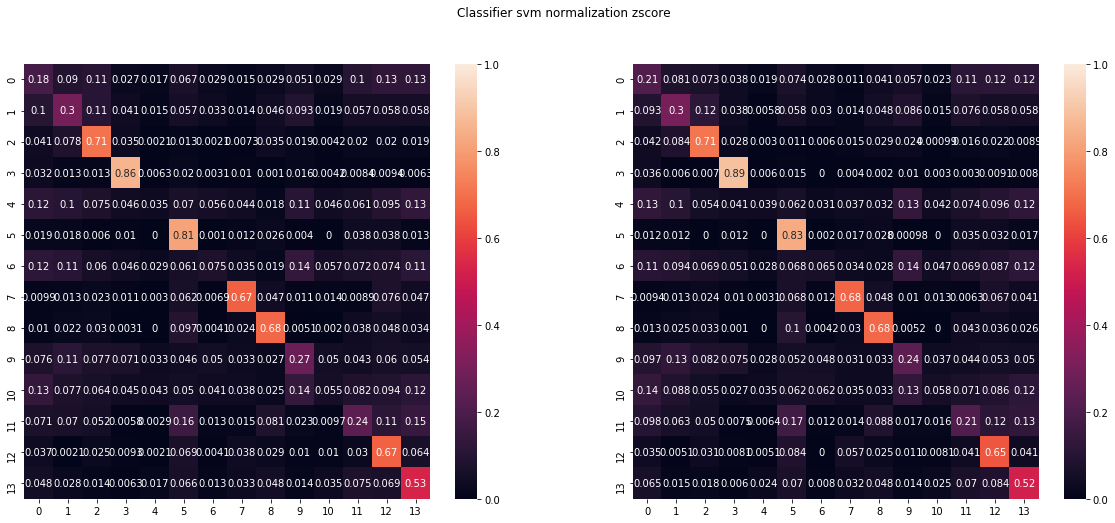

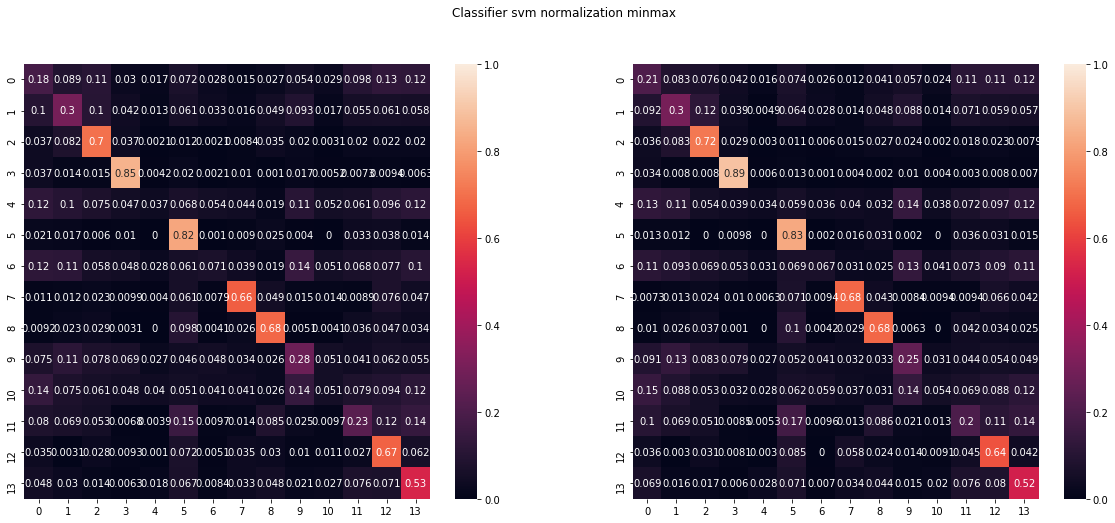

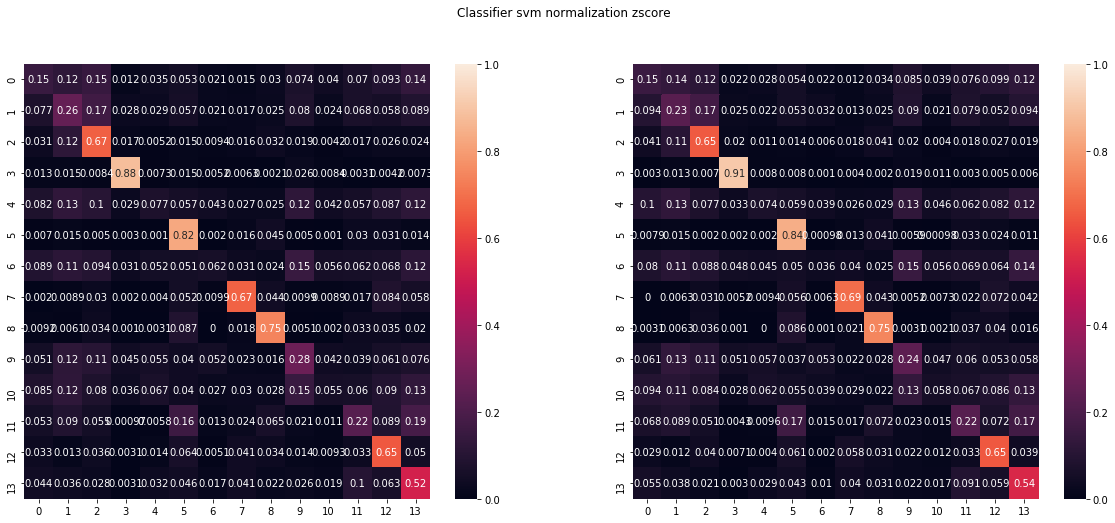

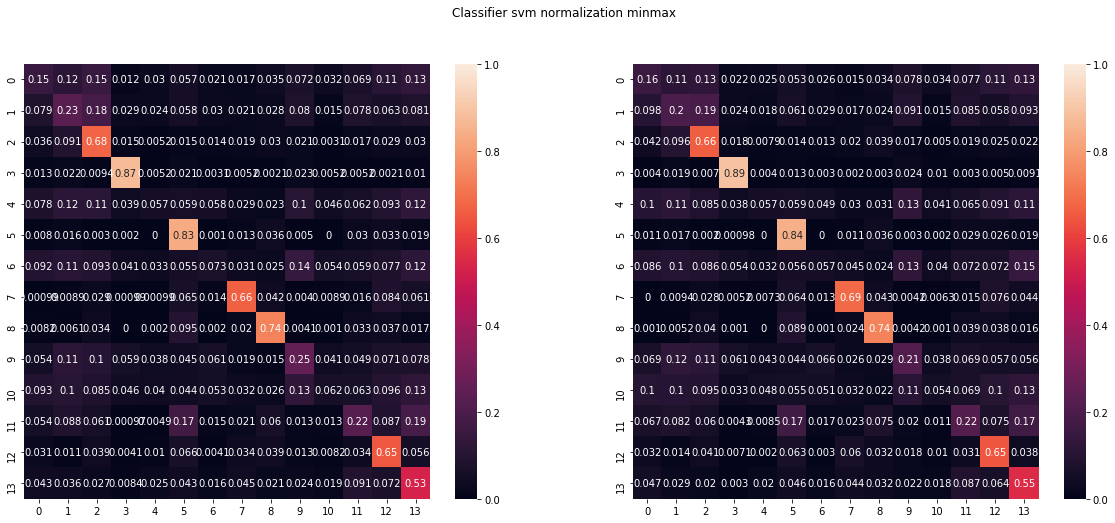

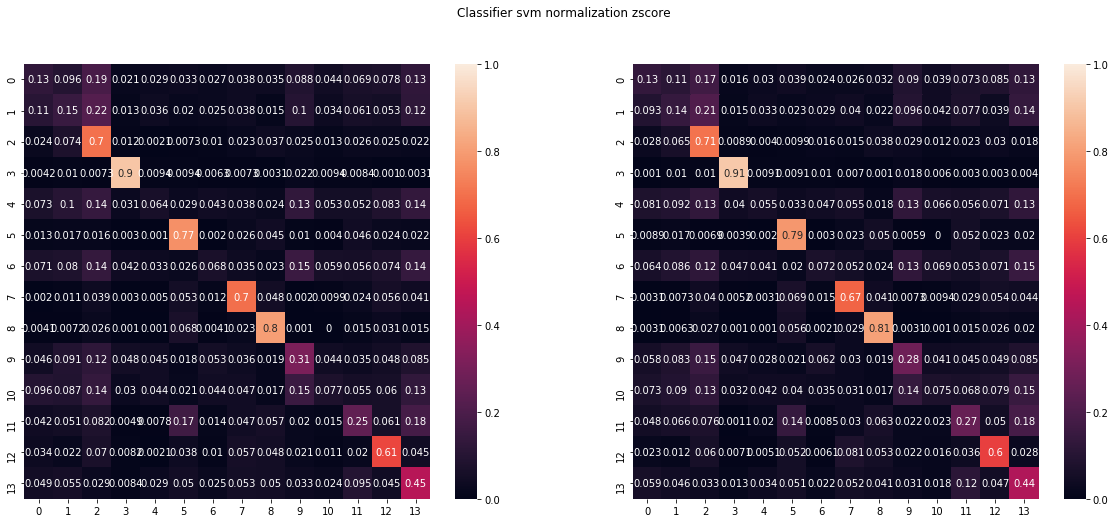

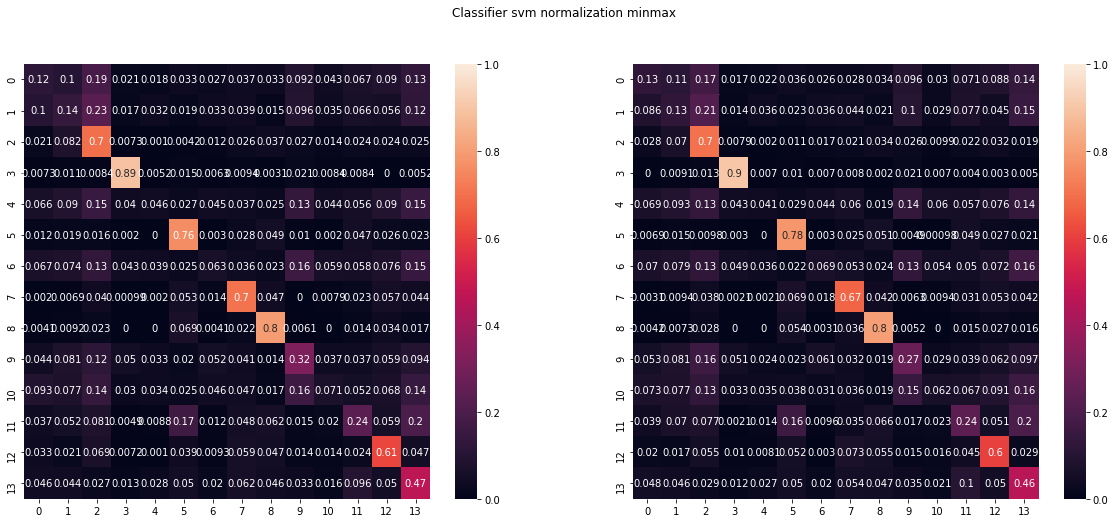

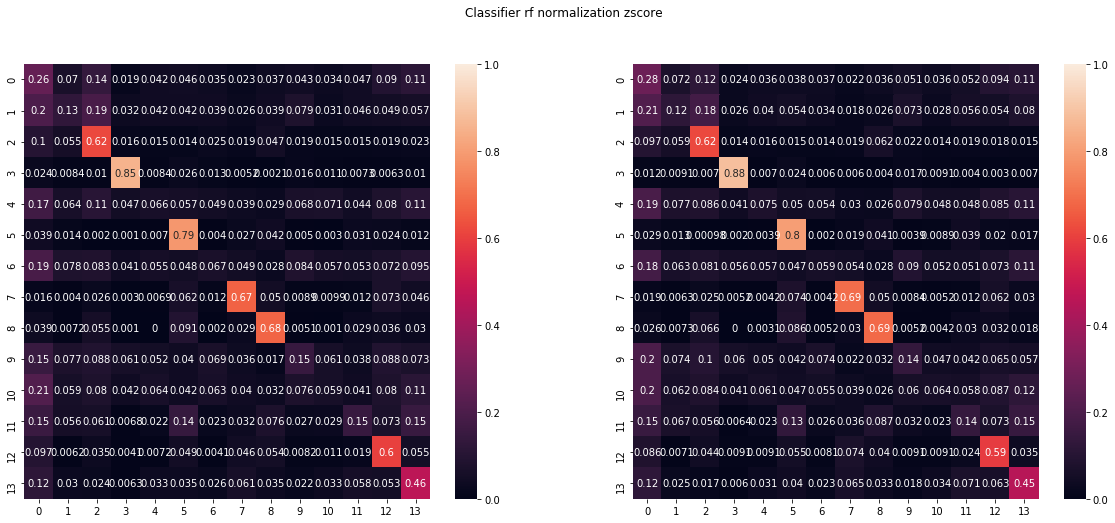

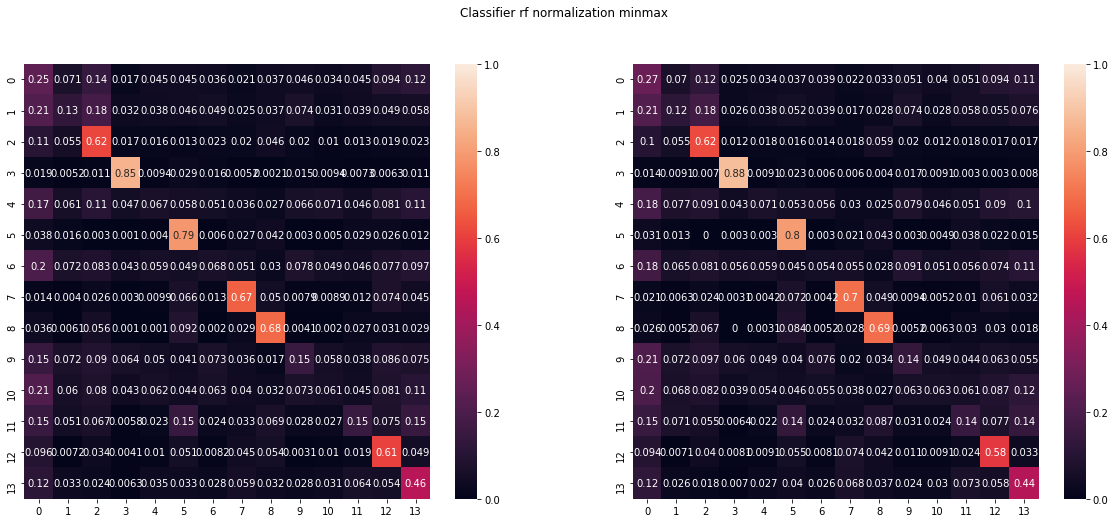

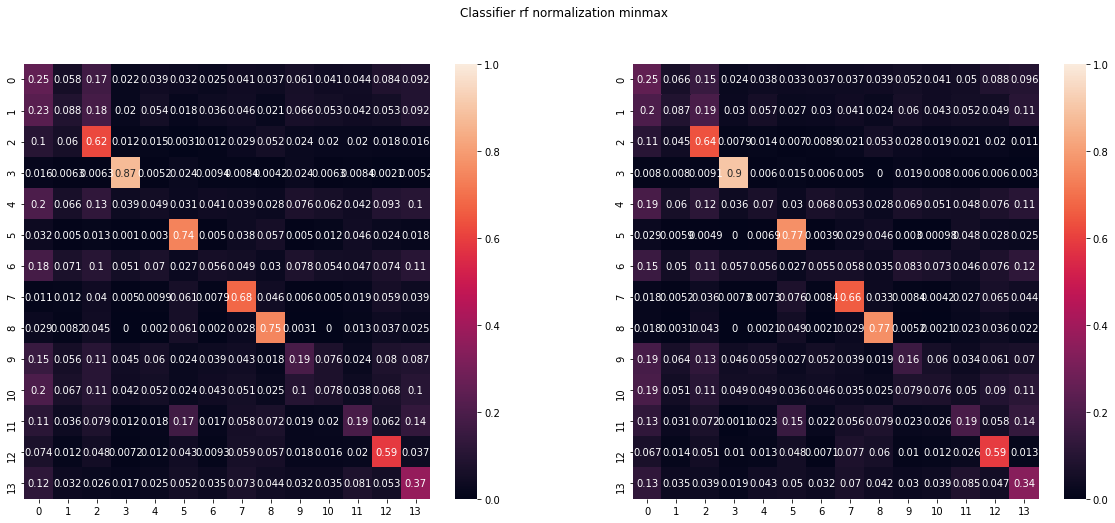

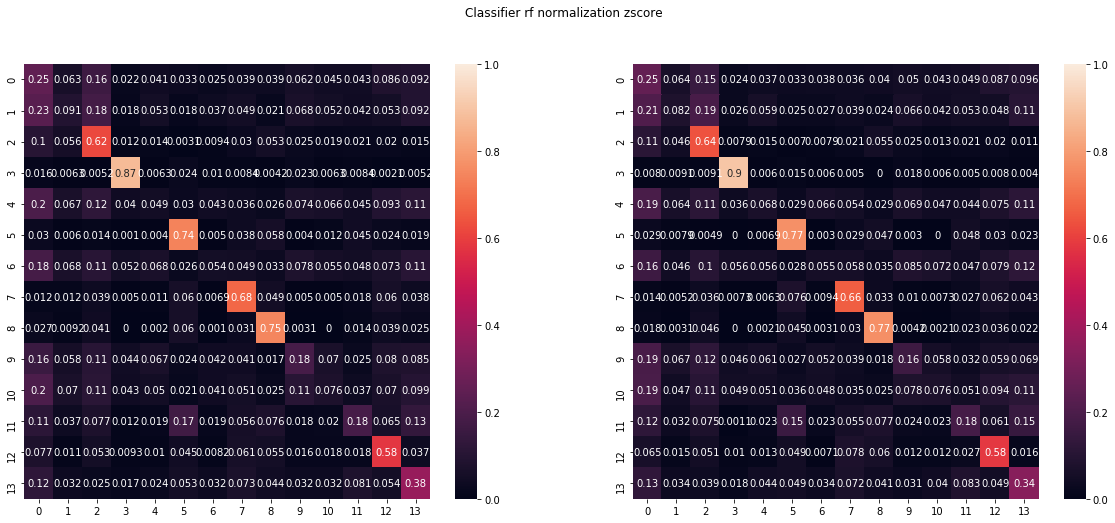

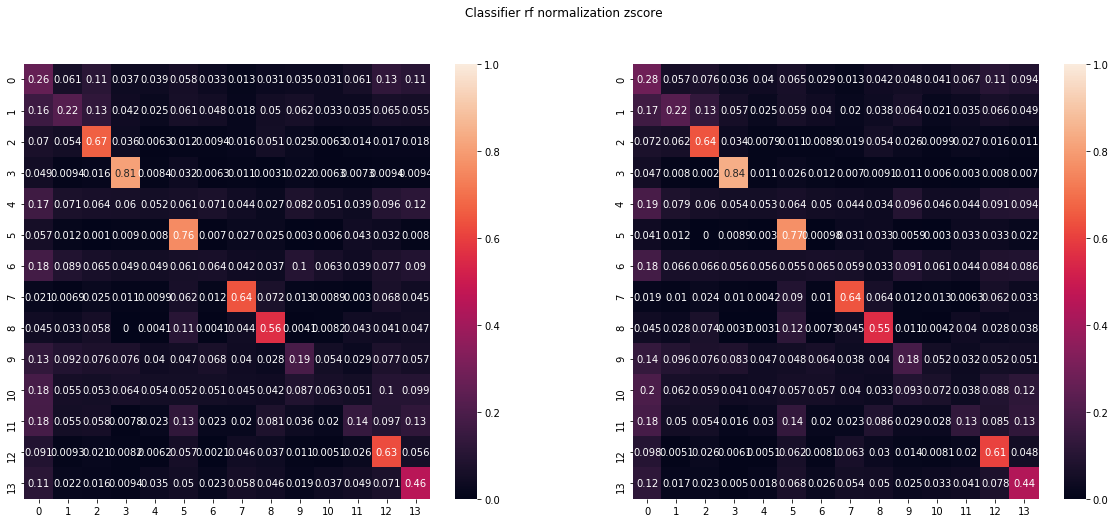

In [13]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier {} normalization {}".format(row['classifier'], row['normalization']))

    #plt.subplot(131)
    #sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(121)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(122)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [14]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("NFFT {} Hop Size {}".format(row['nfft'], row['hop_size']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization zscore
NFFT 512 Hop Size 256
Acc train 0.4522092941307619 Acc dev 0.4351383976153503 Acc eval 0.4342043240411652
Classifier svm normalization minmax
NFFT 512 Hop Size 256
Acc train 0.44801055793656863 Acc dev 0.4334918478369097 Acc eval 0.43363442881366243
Classifier svm normalization zscore
NFFT 256 Hop Size 128
Acc train 0.450727941283871 Acc dev 0.43284107830780877 Acc eval 0.43192475105335854
Classifier svm normalization minmax
NFFT 256 Hop Size 128
Acc train 0.43738049574877147 Acc dev 0.4298324233398277 Acc eval 0.4269302491030601
Classifier svm normalization zscore
NFFT 128 Hop Size 64
Acc train 0.4421335241279056 Acc dev 0.42715411776801 Acc eval 0.4241549862216991
Classifier svm normalization minmax
NFFT 128 Hop Size 64
Acc train 0.4319691107454792 Acc dev 0.42347295542151997 Acc eval 0.41876746540264176
Classifier rf normalization zscore
NFFT 256 Hop Size 128
Acc train 1.0 Acc dev 0.3960422573130645 Acc eval 0.3995673913394722
Classifier rf normal